In [1]:
# Libraries
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols

from scipy.stats.stats import pearsonr

pd.set_option('display.max_rows', None)

/Users/stathis/opt/anaconda3/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


## Open communication Correlation

In [2]:
%store -r open_communication
%store -r hospitals_personalInfo

In [3]:
open_communication

,4. Το προσωπικό μπορεί ελεύθερα να αμφισβητήσει τις αποφάσεις ή τις ενέργειες των ανωτέρων του.,2. Το προσωπικό μιλάει ελεύθερα όταν διαπιστώσει κάτι που επιδρά αρνητικά στη φροντίδα υγείας του ασθενούς.,"6. Το προσωπικό φοβάται να ρωτήσει, όταν κάτι δεν φαίνεται σωστό."
0,2.0,1.0,4.0
1,2.0,1.0,4.0
2,3.0,4.0,2.0
3,4.0,4.0,4.0
4,3.0,5.0,5.0
5,3.0,4.0,4.0
6,4.0,4.0,2.0
7,3.0,5.0,5.0
8,2.0,5.0,4.0
9,5.0,5.0,5.0


In [37]:
relative_frequencies = open_communication.apply(lambda x: x.value_counts(normalize=True))
relative_frequencies


,4. Το προσωπικό μπορεί ελεύθερα να αμφισβητήσει τις αποφάσεις ή τις ενέργειες των ανωτέρων του.,2. Το προσωπικό μιλάει ελεύθερα όταν διαπιστώσει κάτι που επιδρά αρνητικά στη φροντίδα υγείας του ασθενούς.,"6. Το προσωπικό φοβάται να ρωτήσει, όταν κάτι δεν φαίνεται σωστό."
1.0,0.140496,0.037190,0.033058
2.0,0.297521,0.082645,0.152893
3.0,0.305785,0.198347,0.231405
4.0,0.181818,0.392562,0.289256
5.0,0.074380,0.289256,0.293388


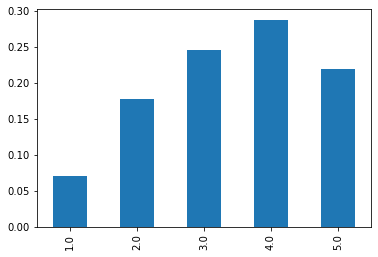

In [57]:
relative_frequencies_sum = relative_frequencies.sum(axis=1)/3
relative_frequencies_sum.plot.bar()
plt.show()

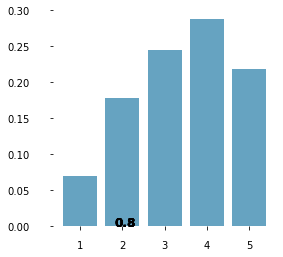

In [80]:
height = relative_frequencies_sum
bars = ('1', '2', '3', '4', '5')


# Figure Size
fig, ax= plt.subplots(figsize =(4, 4))


# Horizontal Bar Plot
ax.bar(bars, height,color=(0.0, 0.4, 0.6, 0.6))

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

    # Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 10)
ax.yaxis.set_tick_params(pad = 20)


# Create bars with different colors
#plt.bar(bars, height, color=(0.0, 0.4, 0.6, 0.6))

# Add annotation to bars
for i in ax.patches:
	plt.text(i.get_width(), i.get_y(),
			str(round((i.get_width()), 2)),
			fontsize = 12, fontweight ='bold',
			color ='black')
    
    

# Create names on the x-axis

# Show graph
plt.show()

In [6]:
relative_frequencies = open_communication.apply(lambda x: x.value_counts(normalize=True))
relative_frequencies

,4. Το προσωπικό μπορεί ελεύθερα να αμφισβητήσει τις αποφάσεις ή τις ενέργειες των ανωτέρων του.,2. Το προσωπικό μιλάει ελεύθερα όταν διαπιστώσει κάτι που επιδρά αρνητικά στη φροντίδα υγείας του ασθενούς.,"6. Το προσωπικό φοβάται να ρωτήσει, όταν κάτι δεν φαίνεται σωστό."
1.0,0.140496,0.037190,0.033058
2.0,0.297521,0.082645,0.152893
3.0,0.305785,0.198347,0.231405
4.0,0.181818,0.392562,0.289256
5.0,0.074380,0.289256,0.293388


In [7]:
positive_answers = relative_frequencies.iloc[3:6].sum().sum()/3
positive_answers

0.5068870523415978

In [8]:
open_communication.describe()

,4. Το προσωπικό μπορεί ελεύθερα να αμφισβητήσει τις αποφάσεις ή τις ενέργειες των ανωτέρων του.,2. Το προσωπικό μιλάει ελεύθερα όταν διαπιστώσει κάτι που επιδρά αρνητικά στη φροντίδα υγείας του ασθενούς.,"6. Το προσωπικό φοβάται να ρωτήσει, όταν κάτι δεν φαίνεται σωστό."
count,242.000000,242.000000,242.000000
mean,2.752066,3.814050,3.657025
std,1.132551,1.059696,1.149658
min,1.000000,1.000000,1.000000
25%,2.000000,3.000000,3.000000
50%,3.000000,4.000000,4.000000
75%,4.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000


## Correlation Analysis between parameter and personal info

In [9]:
# individual score to parameter 

score = open_communication.sum(axis=1)/3


### Gender correlation

In [10]:
gender = hospitals_personalInfo['1. Φύλο: ']

In [11]:
# create a frame with gender and score
gender = pd.concat([gender,score],axis=1)

gender.columns = ['Gender','Score']

male = []
female = []


#create table for every category
for index, row in gender.iterrows(): 
    if row['Gender'] == 'Γυναίκα':
        female.append(row['Score'])
    else:
        male.append(row['Score'])
        



In [12]:
# t-test
from scipy import stats

tStat, pValue = stats.ttest_ind(male, female, equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the 

P-Value:0.000533677980936241 T-Statistic:-3.5575825119742133


### Education Correlation

In [13]:
education = hospitals_personalInfo['3α. Ποια είναι η βασική σας εκπαίδευση;']
education = pd.concat([education,score],axis=1)

education.columns = ['Education','Score']

In [14]:
education.groupby('Education')['Score'].mean()

Education
1. Δευτεροβάθμια (Δ.Ε.)     3.844444
2. Τεχνολογική (Τ.Ε.)       3.525180
3. Πανεπιστημιακή (Π.Ε.)    3.140562
Name: Score, dtype: float64

In [15]:

defterovathmia = []
texnologiki = []
panepistimiaki = []

#create table for every category
for index, row in education.iterrows(): 
    if row['Education'] == '1. Δευτεροβάθμια (Δ.Ε.)':
        defterovathmia.append(row['Score'])
    elif row['Education'] == '2. Τεχνολογική (Τ.Ε.)':
        texnologiki.append(row['Score'])
    else:
        panepistimiaki.append(row['Score'])

        

In [16]:
from scipy.stats import f_oneway

f_oneway(defterovathmia, texnologiki, panepistimiaki)

F_onewayResult(statistic=9.124740346959747, pvalue=0.00015137259919845245)

In [17]:
# Avnova test for education score correlation

model = ols('Score ~ Education', data=education).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
Education,10.700573,2.0,7.552428,0.000663
Residual,165.770126,234.0,NaN,NaN


### Profession Correlation

In [18]:
proffesion = hospitals_personalInfo['10. Τι θέση κατέχετε στο νοσοκομείο που εργάζεστε;']
proffesion= pd.concat([proffesion,score],axis=1)

proffesion.columns = ['Proffesion','Score']

proffesion = proffesion.dropna()

In [19]:
proffesion.groupby('Proffesion')['Score'].mean()

Proffesion
1. Ειδικευόμενος ιατρός    3.098765
2. Ειδικός ιατρός          3.122807
3. ΠΕ Νοσηλευτής           3.411765
4. ΤΕ Νοσηλευτής           3.544776
5. ΔΕ Βοηθός Νοσηλευτή     3.666667
Name: Score, dtype: float64

In [20]:
eidikevomenos_iatros = []
eidikos_iatros = []
pe_nosileftis = []
te_nosileftis = []
de_voithos_nosilefti = []

#create table for every category
for index, row in proffesion.iterrows(): 
    if row['Proffesion'] == '1. Ειδικευόμενος ιατρός':
        eidikevomenos_iatros.append(row['Score'])
    elif row['Proffesion'] == '2. Ειδικός ιατρός':
        eidikos_iatros.append(row['Score'])
    elif row['Proffesion'] == '3. ΠΕ Νοσηλευτής':
        pe_nosileftis.append(row['Score'])
    elif row['Proffesion'] == '4. ΤΕ Νοσηλευτής':
        te_nosileftis.append(row['Score'])
    else:
        de_voithos_nosilefti.append(row['Score'])
        
eidikos_iatros

[3.6666666666666665,
 3.0,
 3.3333333333333335,
 2.0,
 2.6666666666666665,
 3.3333333333333335,
 3.3333333333333335,
 3.0,
 2.6666666666666665,
 4.666666666666667,
 4.0,
 2.0,
 2.3333333333333335,
 2.3333333333333335,
 1.3333333333333333,
 2.3333333333333335,
 3.0,
 3.3333333333333335,
 2.6666666666666665,
 2.6666666666666665,
 4.666666666666667,
 3.6666666666666665,
 3.3333333333333335,
 3.3333333333333335,
 1.3333333333333333,
 2.6666666666666665,
 4.0,
 3.0,
 4.666666666666667,
 3.6666666666666665,
 1.6666666666666667,
 3.6666666666666665,
 3.3333333333333335,
 4.0,
 3.6666666666666665,
 3.3333333333333335,
 3.0,
 4.0]

In [21]:
from scipy.stats import f_oneway

f_oneway(eidikevomenos_iatros, eidikos_iatros, pe_nosileftis,te_nosileftis,de_voithos_nosilefti)

F_onewayResult(statistic=3.275252005107076, pvalue=0.012327865349798937)

In [22]:
# Anova score for correlation Score Proffesion

model = ols('Score ~ Proffesion', data=proffesion).fit()
sm.stats.anova_lm(model, typ=2)


,sum_sq,df,F,PR(>F)
Proffesion,9.261446,4.0,3.275252,0.012328
Residual,161.179183,228.0,NaN,NaN


### Working Hours Correlation

In [23]:
workingHours = hospitals_personalInfo['9. Συνήθως πόσες ώρες την εβδομάδα εργάζεστε στο συγκεκριμένο Νοσοκομείο; …']



In [24]:

workingHours = pd.concat([workingHours,score],axis=1)

workingHours.columns = ['WeeklyHours','Score']

workingHours = workingHours.dropna()

In [25]:
#plt.plot(workingHours['WeeklyHours'], workingHours['Score'], 'o')
#plt.show()

### Age Correlation

In [26]:
age = hospitals_personalInfo['2. Ηλικία…']


In [27]:
ageScore = pd.concat([age,score],axis=1)

ageScore.columns = ['Age','Score']


ageScore = ageScore.dropna()

In [28]:
ageScore

,Age,Score
0,23,2.333333
1,45,2.333333
2,55,3.000000
3,61,4.000000
4,50,4.333333
5,48,3.666667
6,55,3.333333
7,39,4.333333
8,40,3.666667
9,55,5.000000


In [29]:
print(ageScore.corr(method ='pearson'))

       Score
Score    1.0


In [30]:
pearsonr(ageScore['Age'], ageScore['Score'])

ValueError: could not convert string to float: '.'

In [ ]:
plt.plot(ageScore['Age'], ageScore['Score'], 'o')
plt.show()